In [37]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pytorch_lightning
from pytorch_lightning import loggers, Trainer

from dhdrnet.lightning_model import DHDRNet
from dhdrnet.util import DATA_DIR
%matplotlib inline
%load_ext autoreload
%autoreload 2

print(DATA_DIR)

def show(img):
    npimg = img.detach().numpy()
    plt.figure(figsize=(20,10))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/smsx/src/DHDRNet/data


In [38]:
model = DHDRNet()

trainer = Trainer()


INFO:lightning:GPU available: False, used: False


In [39]:
model.prepare_data()
train_loader = model.train_dataloader()

In [40]:
diter = iter(train_loader)
batch = next(diter)
exposure_paths, mid_exposure, ground_truth = batch

In [41]:
from torch.nn import functional as F
import torchvision
from reconstruction import reconstruct_hdr_from_pred
from pytorch_msssim import ssim, ms_ssim

preds = torch.randint(high=4,size=(len(exposure_paths),1))
reconstructed_hdr = reconstruct_hdr_from_pred(exposure_paths,ground_truth,preds)

RGB L2: 0.010421031154692173
RGB SSIM: 0.9985764622688293


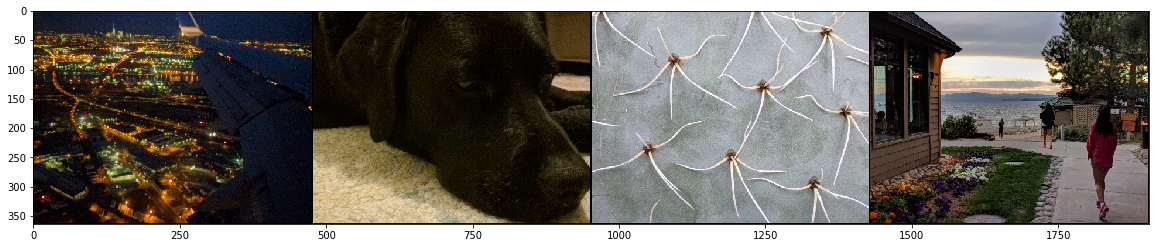

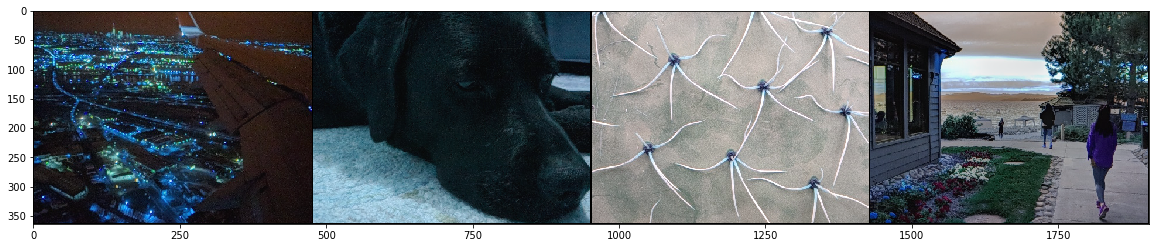

In [42]:
loss_rgb = F.mse_loss(reconstructed_hdr, ground_truth)
ssim_score_rgb = ssim(reconstructed_hdr, ground_truth)
print(f"RGB L2: {loss_rgb}")
print(f"RGB SSIM: {ssim_score_rgb}")

grid_rec = torchvision.utils.make_grid(reconstructed_hdr, normalize=True)
grid_gt = torchvision.utils.make_grid(ground_truth, normalize=True)
show(grid_gt)
show(grid_rec)

In [43]:
rc_yuv, gt_yuv = (
        model.colour_space.from_rgb(im_batch)
        for im_batch in [reconstructed_hdr, ground_truth]
)
